Columns available: ['Day', 'Stock_Volume', 'Sales', 'RBI_Interest_Rate', 'High_Performance']
Coefficients: [-1.22315990e+00  3.10640511e+03]
Intercept: 98145.14209653293
Mean Squared Error: 2273368754.793269
R² Score: 0.055929817924972314


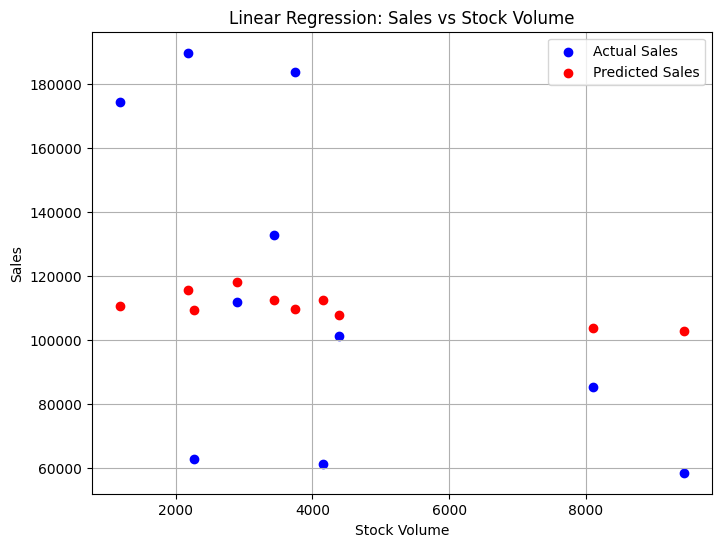

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("stock_sales_interest_dataset.csv")
print("Columns available:", data.columns.tolist())

# Features (independent variables) and target
X = data[["Stock_Volume", "RBI_Interest_Rate"]]  # predictors
y = data["Sales"]                                # target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Output coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Model Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plotting Sales vs Stock Volume (fixing RBI_Interest_Rate effect)
plt.figure(figsize=(8, 6))
plt.scatter(X_test["Stock_Volume"], y_test, color="blue", label="Actual Sales")
plt.scatter(X_test["Stock_Volume"], y_pred, color="red", label="Predicted Sales")
plt.xlabel("Stock Volume")
plt.ylabel("Sales")
plt.title("Linear Regression: Sales vs Stock Volume")
plt.legend()
plt.grid(True)
plt.show()

